In [1]:
#IMport Data Analysis toolkit
import numpy as np
import pandas as pd
#Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
df = pd.read_csv(r"C:\Users\Newton\Projects\Data\housing.csv")

The dataset is a Calirfonia Housing Dataset.The goal is to predict the housing prices using the attributes given

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#To get a description of the data, number of rows ,columns and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The dataset has 20640 rows and 10 attributes. All the columns seems have no missing values except for the total_bedroomns which has 20433 rows non-null rows.

In [5]:
#To get the summary of the numerical attributes
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [6]:
#To check on the values in the categorical column, Ocean proximity
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Ocean proximity has repetitive values, which means it might be a categorical attribute

In [7]:
#To find out how many times each of the categories appear
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

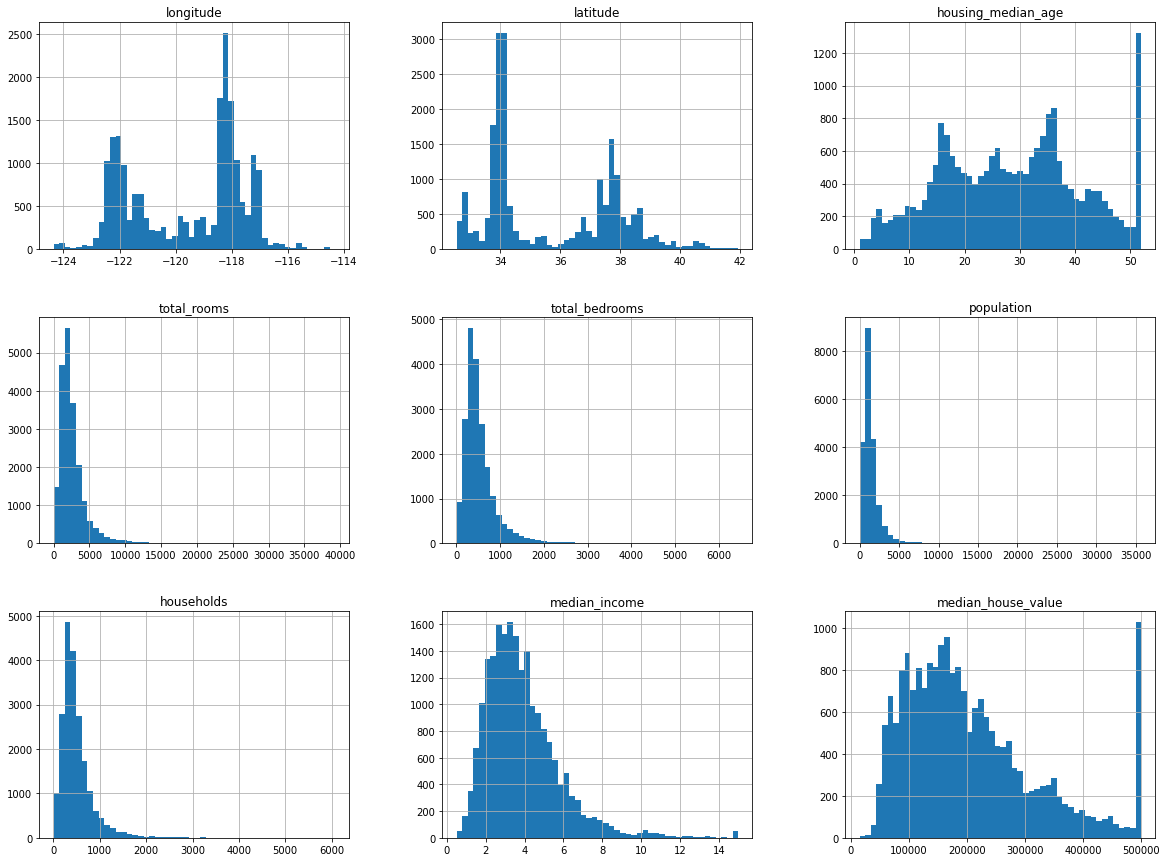

In [8]:
#Visual Representation of the data
df.hist(bins=50, figsize = (20,15))
plt.show

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

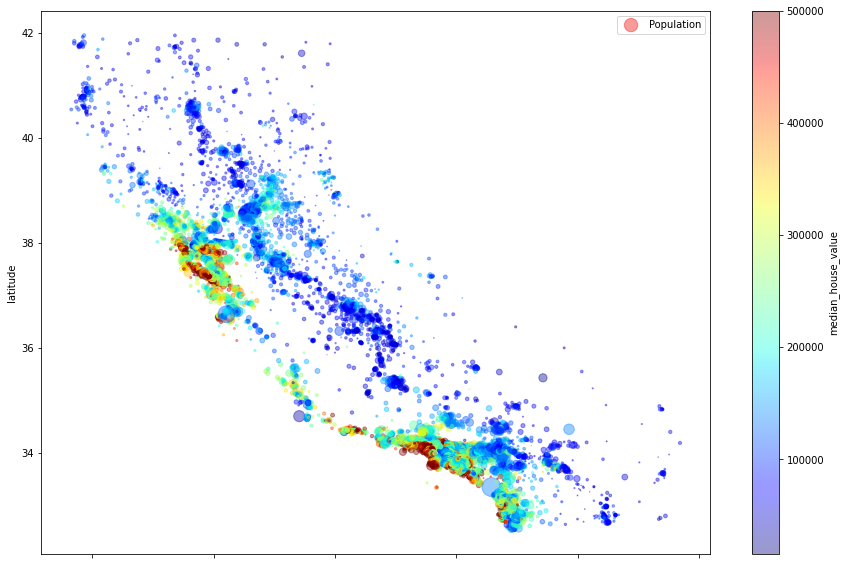

In [9]:
#Visualizing geographical data
df.plot( kind="scatter", x="longitude", y="latitude", alpha =0.4,
             s=df["population"]/100,label = "Population",figsize=(15,10),
            c="median_house_value",cmap=plt.get_cmap("jet"), colorbar=True)


This shows that the housing prices are very much related to the location(like if the houses are near to the ocean) and the population density.

In [10]:
#Correlation
corr_matrix = df.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [11]:
#To look at the correration with the median house value
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

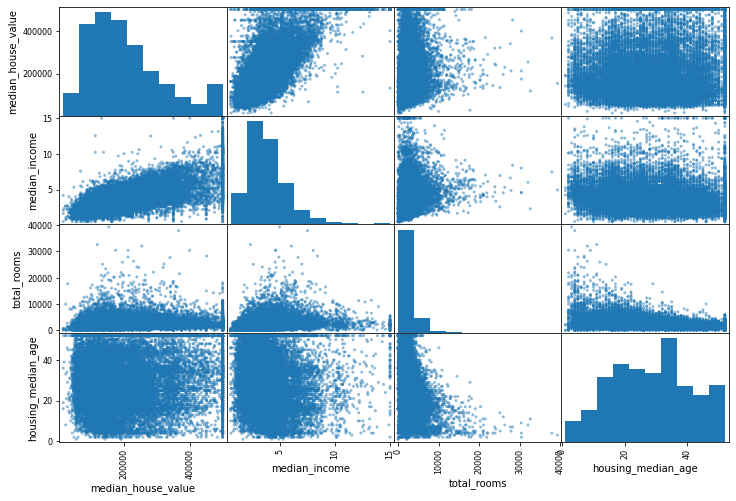

In [12]:
#Plot the attributes in relation to the median housing prices
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]

scatter_matrix(df[attributes],figsize=(12,8))

The most promising attribute to predict the median house value is the median income

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

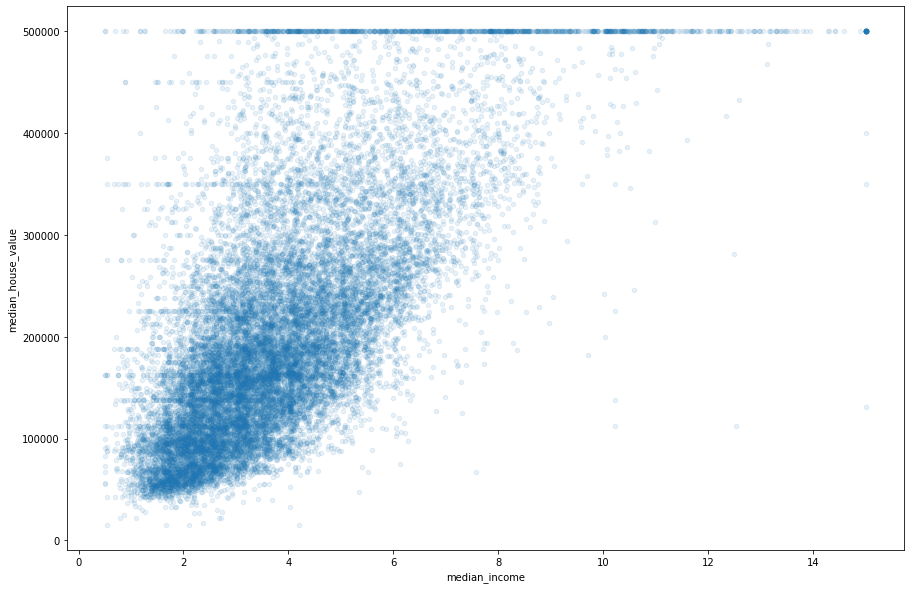

In [13]:
#We zoom in on the median income correlation scatterplot
df.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1,figsize=(15,10))

The Correlatin looks very strong, it has an upward trend and the points are not too dispersed. Prices cap are visible as a horizontal line at $500,000. Another horizontal line at around $450,000,another around $350,000, and perhaps another one around $280,000

In [14]:
#Verifying the data 
#We look at the missing values 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
#We look at the percentage the missing values take 
(df.isnull().sum()/len(df))* 100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

Total bedrooms has 1%  of the data as missing values

<function matplotlib.pyplot.show(close=None, block=None)>

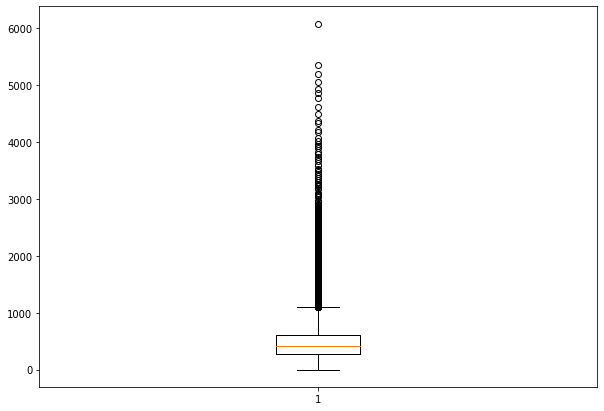

In [16]:
#Looking at outliers
fig = plt.figure(figsize=(10,7))

plt.boxplot(df["households"])
plt.show

longitude


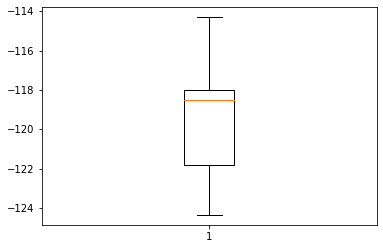

latitude


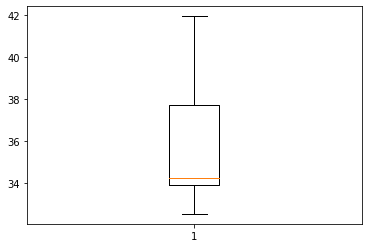

housing_median_age


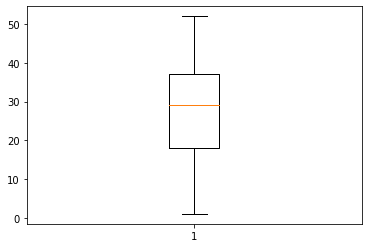

total_rooms


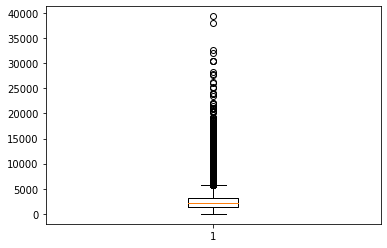

total_bedrooms


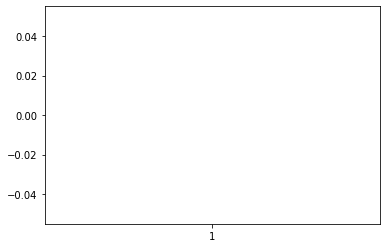

population


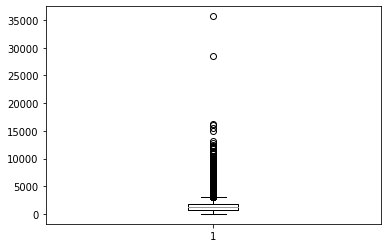

households


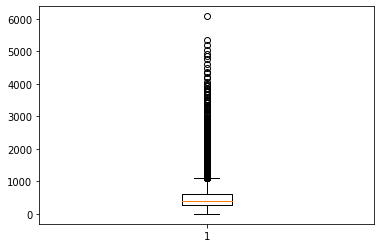

median_income


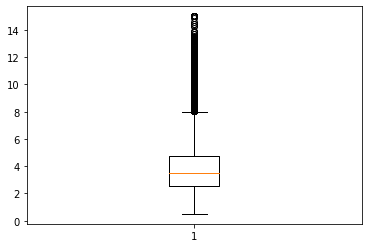

median_house_value


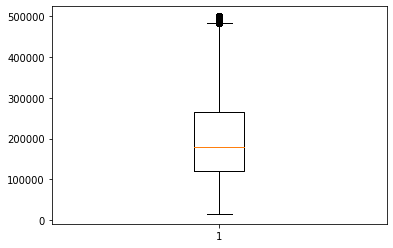

In [17]:
for col in['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']:
    # exlcude ocean_proximity since not numerical variable
    print(col)
    plt.boxplot(df[col])
    plt.show()

This shows that all  features except longitude, latitude and housing_median_age have outliers

### 2. Data Preparation

In [18]:
#Independent Variable
X = df.drop("median_house_value",axis=1)

In [19]:
#Define the dependent variable
Y = df["median_house_value"]

In [20]:
X.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [21]:
Y.head(5)

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [22]:
#Splitting into train and test set
from sklearn.model_selection import train_test_split


In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=38)

In [24]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
7959,-118.18,33.88,44.0,1308.0,267.0,783.0,237.0,4.7361,<1H OCEAN
14599,-117.17,32.82,24.0,1569.0,377.0,715.0,321.0,3.1146,NEAR OCEAN
12062,-117.58,33.87,17.0,2772.0,449.0,1685.0,461.0,5.0464,INLAND
19185,-122.56,38.41,20.0,1151.0,211.0,478.0,183.0,5.9300,<1H OCEAN
3374,-118.30,34.26,42.0,2186.0,423.0,1145.0,439.0,4.8100,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
14064,-117.12,32.75,15.0,2671.0,724.0,1800.0,646.0,2.1394,NEAR OCEAN
18268,-122.06,37.36,34.0,1747.0,250.0,662.0,257.0,6.8268,<1H OCEAN
4412,-118.25,34.08,44.0,1425.0,438.0,1121.0,374.0,2.1108,<1H OCEAN
13779,-117.05,34.02,21.0,3098.0,646.0,1351.0,614.0,2.5980,INLAND


In [25]:
Y_train

7959     167700.0
14599    187500.0
12062    163900.0
19185    384600.0
3374     191900.0
           ...   
14064    106700.0
18268    500001.0
4412     200000.0
13779    106700.0
20533    326500.0
Name: median_house_value, Length: 16512, dtype: float64

### Data Cleaning

In [26]:
X_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [27]:
X_test.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        31
population             0
households             0
median_income          0
ocean_proximity        0
dtype: int64

In [28]:
#THe only attribute with missing values is the total_bedrooms
#We use the median to fill the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [29]:
#Since we cant use median for the catrgorical column, we drop the ocean proximity column
num_X_train = X_train.drop("ocean_proximity",axis=1)
num_X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
7959,-118.18,33.88,44.0,1308.0,267.0,783.0,237.0,4.7361
14599,-117.17,32.82,24.0,1569.0,377.0,715.0,321.0,3.1146
12062,-117.58,33.87,17.0,2772.0,449.0,1685.0,461.0,5.0464
19185,-122.56,38.41,20.0,1151.0,211.0,478.0,183.0,5.9300
3374,-118.30,34.26,42.0,2186.0,423.0,1145.0,439.0,4.8100
...,...,...,...,...,...,...,...,...
14064,-117.12,32.75,15.0,2671.0,724.0,1800.0,646.0,2.1394
18268,-122.06,37.36,34.0,1747.0,250.0,662.0,257.0,6.8268
4412,-118.25,34.08,44.0,1425.0,438.0,1121.0,374.0,2.1108
13779,-117.05,34.02,21.0,3098.0,646.0,1351.0,614.0,2.5980


In [30]:
cat_X_train = X_train[["ocean_proximity"]]

In [31]:
cat_X_train.head(5)

,ocean_proximity
7959,<1H OCEAN
14599,NEAR OCEAN
12062,INLAND
19185,<1H OCEAN
3374,<1H OCEAN


In [32]:
#TO familiarize the class IMputer with the data
imputer.fit(num_X_train)

SimpleImputer(strategy='median')

In [69]:
#Transformig the data will return an array, we have to change into dataframe
filled_num_X_train = pd.DataFrame(imputer.transform(num_X_train),columns=num_X_train.columns,index=num_X_train.index)

In [71]:
filled_num_X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
7959,-118.18,33.88,44.0,1308.0,267.0,783.0,237.0,4.7361
14599,-117.17,32.82,24.0,1569.0,377.0,715.0,321.0,3.1146
12062,-117.58,33.87,17.0,2772.0,449.0,1685.0,461.0,5.0464
19185,-122.56,38.41,20.0,1151.0,211.0,478.0,183.0,5.9300
3374,-118.30,34.26,42.0,2186.0,423.0,1145.0,439.0,4.8100
...,...,...,...,...,...,...,...,...
14064,-117.12,32.75,15.0,2671.0,724.0,1800.0,646.0,2.1394
18268,-122.06,37.36,34.0,1747.0,250.0,662.0,257.0,6.8268
4412,-118.25,34.08,44.0,1425.0,438.0,1121.0,374.0,2.1108
13779,-117.05,34.02,21.0,3098.0,646.0,1351.0,614.0,2.5980


In [72]:
#All the missing values have been removed.
filled_num_X_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [73]:
#Using what the imputer learned from the training data, we can use it to fill the testing data without worrying about leackage
X_test.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        31
population             0
households             0
median_income          0
ocean_proximity        0
dtype: int64

In [74]:
#We drop the ocean proximity column since we cant use median on categorical data
num_X_test = X_test.drop("ocean_proximity",axis=1)

In [75]:
num_X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4920,-118.25,34.00,36.0,1176.0,309.0,1267.0,292.0,1.6382
3113,-117.66,35.62,11.0,5897.0,1138.0,2728.0,1072.0,4.1500
4054,-118.43,34.15,31.0,1856.0,425.0,795.0,426.0,2.8448
1466,-121.98,37.96,12.0,5048.0,1122.0,2209.0,1014.0,3.1573
7038,-118.09,33.96,20.0,1911.0,472.0,1407.0,465.0,2.7647
...,...,...,...,...,...,...,...,...
14866,-117.10,32.64,29.0,1578.0,460.0,1236.0,461.0,2.5658
19504,-121.02,37.65,20.0,2973.0,620.0,1996.0,570.0,3.0645
14403,-117.25,32.78,36.0,1527.0,427.0,710.0,312.0,2.7857
16407,-121.17,37.97,28.0,1374.0,248.0,769.0,229.0,3.6389


In [76]:
cat_X_test = X_test[["ocean_proximity"]]

In [77]:
cat_X_test

,ocean_proximity
4920,<1H OCEAN
3113,INLAND
4054,<1H OCEAN
1466,INLAND
7038,<1H OCEAN
...,...
14866,NEAR OCEAN
19504,INLAND
14403,NEAR OCEAN
16407,INLAND


In [78]:
#We replace the missing values with the median
filled_num_X_test = pd.DataFrame(imputer.transform(num_X_test),columns=num_X_test.columns,index=num_X_test.index)

In [79]:
filled_num_X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4920,-118.25,34.00,36.0,1176.0,309.0,1267.0,292.0,1.6382
3113,-117.66,35.62,11.0,5897.0,1138.0,2728.0,1072.0,4.1500
4054,-118.43,34.15,31.0,1856.0,425.0,795.0,426.0,2.8448
1466,-121.98,37.96,12.0,5048.0,1122.0,2209.0,1014.0,3.1573
7038,-118.09,33.96,20.0,1911.0,472.0,1407.0,465.0,2.7647
...,...,...,...,...,...,...,...,...
14866,-117.10,32.64,29.0,1578.0,460.0,1236.0,461.0,2.5658
19504,-121.02,37.65,20.0,2973.0,620.0,1996.0,570.0,3.0645
14403,-117.25,32.78,36.0,1527.0,427.0,710.0,312.0,2.7857
16407,-121.17,37.97,28.0,1374.0,248.0,769.0,229.0,3.6389


In [81]:
filled_num_X_test.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [43]:
#We encode the categorical columns 
from sklearn.preprocessing import OneHotEncoder

In [44]:
Enc = OneHotEncoder()

In [45]:
cat_X_train.head()

,ocean_proximity
7959,<1H OCEAN
14599,NEAR OCEAN
12062,INLAND
19185,<1H OCEAN
3374,<1H OCEAN


In [46]:
Enc.fit(cat_X_train)

OneHotEncoder()

In [89]:
Enc.get_feature_names_out(["ocean_proximity"])

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [87]:
Enc_cat_X_train=pd.DataFrame(Enc.transform(cat_X_train).toarray(),columns=Enc.get_feature_names_out(["ocean_proximity"]),index=cat_X_train.index)

In [88]:
Enc_cat_X_train

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7959,1.0,0.0,0.0,0.0,0.0
14599,0.0,0.0,0.0,0.0,1.0
12062,0.0,1.0,0.0,0.0,0.0
19185,1.0,0.0,0.0,0.0,0.0
3374,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
14064,0.0,0.0,0.0,0.0,1.0
18268,1.0,0.0,0.0,0.0,0.0
4412,1.0,0.0,0.0,0.0,0.0
13779,0.0,1.0,0.0,0.0,0.0


In [90]:
Enc_cat_X_test= pd.DataFrame(Enc.transform(cat_X_test).toarray(),columns=Enc.get_feature_names_out(["ocean_proximity"]),index=cat_X_test.index)

In [91]:
Enc_cat_X_test

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
4920,1.0,0.0,0.0,0.0,0.0
3113,0.0,1.0,0.0,0.0,0.0
4054,1.0,0.0,0.0,0.0,0.0
1466,0.0,1.0,0.0,0.0,0.0
7038,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
14866,0.0,0.0,0.0,0.0,1.0
19504,0.0,1.0,0.0,0.0,0.0
14403,0.0,0.0,0.0,0.0,1.0
16407,0.0,1.0,0.0,0.0,0.0


In [93]:
Trans_X_train = pd.concat([filled_num_X_train,Enc_cat_X_train],axis=1)

In [94]:
Trans_X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7959,-118.18,33.88,44.0,1308.0,267.0,783.0,237.0,4.7361,1.0,0.0,0.0,0.0,0.0
14599,-117.17,32.82,24.0,1569.0,377.0,715.0,321.0,3.1146,0.0,0.0,0.0,0.0,1.0
12062,-117.58,33.87,17.0,2772.0,449.0,1685.0,461.0,5.0464,0.0,1.0,0.0,0.0,0.0
19185,-122.56,38.41,20.0,1151.0,211.0,478.0,183.0,5.9300,1.0,0.0,0.0,0.0,0.0
3374,-118.30,34.26,42.0,2186.0,423.0,1145.0,439.0,4.8100,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14064,-117.12,32.75,15.0,2671.0,724.0,1800.0,646.0,2.1394,0.0,0.0,0.0,0.0,1.0
18268,-122.06,37.36,34.0,1747.0,250.0,662.0,257.0,6.8268,1.0,0.0,0.0,0.0,0.0
4412,-118.25,34.08,44.0,1425.0,438.0,1121.0,374.0,2.1108,1.0,0.0,0.0,0.0,0.0
13779,-117.05,34.02,21.0,3098.0,646.0,1351.0,614.0,2.5980,0.0,1.0,0.0,0.0,0.0


In [97]:
Trans_X_test = pd.concat([filled_num_X_test,Enc_cat_X_test],axis=1)

In [98]:
Trans_X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
4920,-118.25,34.00,36.0,1176.0,309.0,1267.0,292.0,1.6382,1.0,0.0,0.0,0.0,0.0
3113,-117.66,35.62,11.0,5897.0,1138.0,2728.0,1072.0,4.1500,0.0,1.0,0.0,0.0,0.0
4054,-118.43,34.15,31.0,1856.0,425.0,795.0,426.0,2.8448,1.0,0.0,0.0,0.0,0.0
1466,-121.98,37.96,12.0,5048.0,1122.0,2209.0,1014.0,3.1573,0.0,1.0,0.0,0.0,0.0
7038,-118.09,33.96,20.0,1911.0,472.0,1407.0,465.0,2.7647,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14866,-117.10,32.64,29.0,1578.0,460.0,1236.0,461.0,2.5658,0.0,0.0,0.0,0.0,1.0
19504,-121.02,37.65,20.0,2973.0,620.0,1996.0,570.0,3.0645,0.0,1.0,0.0,0.0,0.0
14403,-117.25,32.78,36.0,1527.0,427.0,710.0,312.0,2.7857,0.0,0.0,0.0,0.0,1.0
16407,-121.17,37.97,28.0,1374.0,248.0,769.0,229.0,3.6389,0.0,1.0,0.0,0.0,0.0


### Feature Engineering

In [99]:
Trans_X_train["rooms_per_househols"] = Trans_X_train["total_rooms"]/Trans_X_train["households"]
Trans_X_train["bedrooms_per_room"] = Trans_X_train["total_bedrooms"]/Trans_X_train["total_rooms"]
Trans_X_train["population_per_household"] = Trans_X_train["population"]/Trans_X_train["households"]

In [100]:
Trans_X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_househols,bedrooms_per_room,population_per_household
7959,-118.18,33.88,44.0,1308.0,267.0,783.0,237.0,4.7361,1.0,0.0,0.0,0.0,0.0,5.518987,0.204128,3.303797
14599,-117.17,32.82,24.0,1569.0,377.0,715.0,321.0,3.1146,0.0,0.0,0.0,0.0,1.0,4.887850,0.240280,2.227414
12062,-117.58,33.87,17.0,2772.0,449.0,1685.0,461.0,5.0464,0.0,1.0,0.0,0.0,0.0,6.013015,0.161977,3.655098
19185,-122.56,38.41,20.0,1151.0,211.0,478.0,183.0,5.9300,1.0,0.0,0.0,0.0,0.0,6.289617,0.183319,2.612022
3374,-118.30,34.26,42.0,2186.0,423.0,1145.0,439.0,4.8100,1.0,0.0,0.0,0.0,0.0,4.979499,0.193504,2.608200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14064,-117.12,32.75,15.0,2671.0,724.0,1800.0,646.0,2.1394,0.0,0.0,0.0,0.0,1.0,4.134675,0.271060,2.786378
18268,-122.06,37.36,34.0,1747.0,250.0,662.0,257.0,6.8268,1.0,0.0,0.0,0.0,0.0,6.797665,0.143102,2.575875
4412,-118.25,34.08,44.0,1425.0,438.0,1121.0,374.0,2.1108,1.0,0.0,0.0,0.0,0.0,3.810160,0.307368,2.997326
13779,-117.05,34.02,21.0,3098.0,646.0,1351.0,614.0,2.5980,0.0,1.0,0.0,0.0,0.0,5.045603,0.208522,2.200326


In [102]:
#We look at the correration
Trans_X_train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_househols,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924169,-0.102894,0.037779,0.063844,0.092814,0.048977,-0.013736,0.327540,-0.058858,0.009438,-0.473094,0.038346,-0.026282,0.083096,0.000895
latitude,-0.924169,1.000000,0.006903,-0.028167,-0.060751,-0.101774,-0.065100,-0.082049,-0.452970,0.354889,-0.016573,0.356503,-0.153767,0.105456,-0.103037,0.003707
housing_median_age,-0.102894,0.006903,1.000000,-0.360567,-0.315458,-0.293636,-0.299903,-0.121424,0.047059,-0.235124,0.021725,0.252095,0.019762,-0.147827,0.139482,0.012329
total_rooms,0.037779,-0.028167,-0.360567,1.000000,0.926044,0.853277,0.918042,0.198142,-0.005042,0.030844,-0.007791,-0.020338,-0.015926,0.133673,-0.195588,-0.024555
total_bedrooms,0.063844,-0.060751,-0.315458,0.926044,1.000000,0.868267,0.973003,-0.007312,0.017889,-0.003980,-0.005237,-0.018198,-0.003713,0.004009,0.071900,-0.028179
population,0.092814,-0.101774,-0.293636,0.853277,0.868267,1.000000,0.903257,0.005843,0.074190,-0.018156,-0.010607,-0.058352,-0.029612,-0.071293,0.004812,0.070770
households,0.048977,-0.065100,-0.299903,0.918042,0.973003,0.903257,1.000000,0.013439,0.043152,-0.038513,-0.009641,-0.008231,-0.002341,-0.080834,0.032770,-0.027138
median_income,-0.013736,-0.082049,-0.121424,0.198142,-0.007312,0.005843,0.013439,1.000000,0.172238,-0.236399,-0.008090,0.051803,0.024759,0.312987,-0.560150,0.021616
ocean_proximity_<1H OCEAN,0.327540,-0.452970,0.047059,-0.005042,0.017889,0.074190,0.043152,0.172238,1.000000,-0.607160,-0.013877,-0.314260,-0.343919,-0.101787,0.070515,-0.002869
ocean_proximity_INLAND,-0.058858,0.354889,-0.235124,0.030844,-0.003980,-0.018156,-0.038513,-0.236399,-0.607160,1.000000,-0.010601,-0.240073,-0.262731,0.154512,-0.106860,0.015257


In [103]:
Trans_X_test["rooms_per_househols"] = Trans_X_test["total_rooms"]/Trans_X_test["households"]
Trans_X_test["bedrooms_per_room"] = Trans_X_test["total_bedrooms"]/Trans_X_test["total_rooms"]
Trans_X_test["population_per_household"] = Trans_X_test["population"]/Trans_X_test["households"]

In [104]:
Trans_X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_househols,bedrooms_per_room,population_per_household
4920,-118.25,34.00,36.0,1176.0,309.0,1267.0,292.0,1.6382,1.0,0.0,0.0,0.0,0.0,4.027397,0.262755,4.339041
3113,-117.66,35.62,11.0,5897.0,1138.0,2728.0,1072.0,4.1500,0.0,1.0,0.0,0.0,0.0,5.500933,0.192979,2.544776
4054,-118.43,34.15,31.0,1856.0,425.0,795.0,426.0,2.8448,1.0,0.0,0.0,0.0,0.0,4.356808,0.228987,1.866197
1466,-121.98,37.96,12.0,5048.0,1122.0,2209.0,1014.0,3.1573,0.0,1.0,0.0,0.0,0.0,4.978304,0.222266,2.178501
7038,-118.09,33.96,20.0,1911.0,472.0,1407.0,465.0,2.7647,1.0,0.0,0.0,0.0,0.0,4.109677,0.246991,3.025806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14866,-117.10,32.64,29.0,1578.0,460.0,1236.0,461.0,2.5658,0.0,0.0,0.0,0.0,1.0,3.422993,0.291508,2.681128
19504,-121.02,37.65,20.0,2973.0,620.0,1996.0,570.0,3.0645,0.0,1.0,0.0,0.0,0.0,5.215789,0.208544,3.501754
14403,-117.25,32.78,36.0,1527.0,427.0,710.0,312.0,2.7857,0.0,0.0,0.0,0.0,1.0,4.894231,0.279633,2.275641
16407,-121.17,37.97,28.0,1374.0,248.0,769.0,229.0,3.6389,0.0,1.0,0.0,0.0,0.0,6.000000,0.180495,3.358079


### Scaling

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
sts = StandardScaler()

In [107]:
sts.fit(Trans_X_train)

StandardScaler()

In [108]:
prep_X_train=pd.DataFrame(sts.transform(Trans_X_train),columns=Trans_X_train.columns, index=Trans_X_train.index)

In [109]:
prep_X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_househols,bedrooms_per_room,population_per_household
7959,0.697533,-0.821636,1.216737,-0.613052,-0.646292,-0.562809,-0.688038,0.454495,1.121698,-0.681051,-0.015566,-0.352505,-0.385773,0.035239,-0.154101,0.018742
14599,1.202243,-1.317055,-0.373861,-0.491390,-0.380510,-0.623008,-0.466131,-0.401690,-0.891506,-0.681051,-0.015566,-0.352505,2.592199,-0.213271,0.411867,-0.075118
12062,0.997361,-0.826310,-0.930570,0.069373,-0.206545,0.235712,-0.096285,0.618340,-0.891506,1.468320,-0.015566,-0.352505,-0.385773,0.229761,-0.813993,0.049376
19185,-1.491210,1.295580,-0.691980,-0.686236,-0.781598,-0.832820,-0.830693,1.084899,1.121698,-0.681051,-0.015566,-0.352505,-0.385773,0.338673,-0.479880,-0.041581
3374,0.637567,-0.644033,1.057677,-0.203783,-0.269366,-0.242338,-0.154403,0.493516,1.121698,-0.681051,-0.015566,-0.352505,-0.385773,-0.177184,-0.320427,-0.041914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14064,1.227229,-1.349771,-1.089630,0.022293,0.457908,0.337519,0.392440,-0.916615,-0.891506,-0.681051,-0.015566,-0.352505,2.592199,-0.509833,0.893721,-0.026377
18268,-1.241354,0.804835,0.421438,-0.408418,-0.687367,-0.669928,-0.635203,1.558428,1.121698,-0.681051,-0.015566,-0.352505,-0.385773,0.538716,-1.109477,-0.044733
4412,0.662553,-0.728161,1.216737,-0.558514,-0.233123,-0.263585,-0.326118,-0.931717,1.121698,-0.681051,-0.015566,-0.352505,-0.385773,-0.637610,1.462145,-0.007982
13779,1.262209,-0.756203,-0.612450,0.221334,0.269445,-0.059971,0.307904,-0.674465,-0.891506,1.468320,-0.015566,-0.352505,-0.385773,-0.151156,-0.085325,-0.077481


In [110]:
prep_X_test=pd.DataFrame(sts.transform(Trans_X_test),columns=Trans_X_test.columns,index=Trans_X_test.index)

In [111]:
prep_X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_househols,bedrooms_per_room,population_per_household
4920,0.662553,-0.765551,0.580498,-0.674582,-0.544812,-0.134334,-0.542742,-1.181259,1.121698,-0.681051,-0.015566,-0.352505,-0.385773,-0.552073,0.763713,0.109016
3113,0.957384,-0.008400,-1.407749,1.526052,1.458212,1.159058,1.517829,0.145022,-0.891506,1.468320,-0.015566,-0.352505,-0.385773,0.028130,-0.328640,-0.047444
4054,0.572605,-0.695444,0.182848,-0.357609,-0.264533,-0.552186,-0.188746,-0.544150,1.121698,-0.681051,-0.015566,-0.352505,-0.385773,-0.422368,0.235067,-0.106617
1466,-1.201377,1.085261,-1.328219,1.130302,1.419553,0.699599,1.364607,-0.379143,-0.891506,1.468320,-0.015566,-0.352505,-0.385773,-0.177655,0.129851,-0.079384
7038,0.742507,-0.784246,-0.691980,-0.331971,-0.150972,-0.010395,-0.085718,-0.586444,1.121698,-0.681051,-0.015566,-0.352505,-0.385773,-0.519675,0.516924,-0.005499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14866,1.237223,-1.401183,0.023789,-0.487195,-0.179966,-0.161778,-0.096285,-0.691468,-0.891506,-0.681051,-0.015566,-0.352505,2.592199,-0.790056,1.213850,-0.035555
19504,-0.721652,0.940374,-0.691980,0.163067,0.206624,0.511034,0.191667,-0.428144,-0.891506,1.468320,-0.015566,-0.352505,-0.385773,-0.084145,-0.084981,0.036004
14403,1.162266,-1.335750,0.580498,-0.510968,-0.259701,-0.627435,-0.489906,-0.575356,-0.891506,-0.681051,-0.015566,-0.352505,2.592199,-0.210759,1.027945,-0.070913
16407,-0.796609,1.089935,-0.055741,-0.582287,-0.692199,-0.575203,-0.709172,-0.124849,-0.891506,1.468320,-0.015566,-0.352505,-0.385773,0.224637,-0.524089,0.023476


### Modelling

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
lgr = LinearRegression()

In [123]:
lgr.fit(prep_X_train,Y_train)

LinearRegression()

In [127]:
lr_pred=lgr.predict(prep_X_train)

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [131]:
mean_absolute_error(Y_train,lr_pred)

49331.26301656627

In [132]:
mse = mean_squared_error(Y_train,lr_pred)
np.sqrt(mse)

68240.44794433603

In [133]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(prep_X_train,Y_train)

DecisionTreeRegressor()

In [135]:
d_pred = tree_reg.predict(prep_X_train)
d_pred

array([167700., 187500., 163900., ..., 200000., 106700., 326500.])

In [137]:
mean_absolute_error(Y_train,d_pred)

0.0